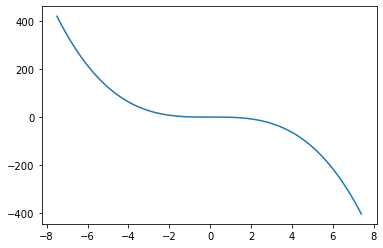

In [3]:
#%matplotlib widget
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


## simulate a realization of a motion in a potential
T = 20000
x = np.tile(0.0,T)
dt = 0.1

sqdt=np.sqrt(dt)
x0=-1
sigma = 0.34
##sigma = 2.5
## parameters controllong the height of the barrier
beta=.17
##beta=13
xa = (np.array(range(150))-75)/10.

def myenergy(x):
    return(-x**3+beta*x)

plt.plot(xa,myenergy(xa))
plt.show()


x[0]=x0
t = 1
while (t < T):
    ## simple forward Euler
    ##beta=beta - 0.0001
    x[t] = x[t-1]+dt*(x[t-1]**2-beta)+sqdt*rnd.randn()*sigma
    if (x[t] > 40):
        break
    t = t+1

## need to downsample X a little
tmax=t
nx=x[10:tmax:2]
##plt.plot(nx)
##plt.show()




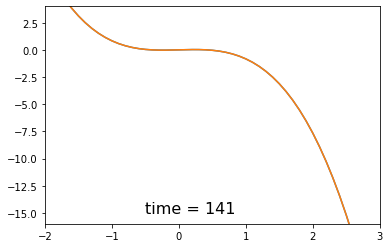

In [4]:
## animate the motion in the potential
from matplotlib import rc
rc('animation', html='jshtml')

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'bo')

text=plt.text(-0.5,-15,"",fontsize=16)

def init():
    ax.set_xlim(-2,3)
    ax.set_ylim(-16, 4)
    ax.plot(xa,-xa**3+beta*xa)
    text.set_text("time = " + str(0.0))
    return ln,text

def update(i):
    ln.set_data([nx[i]], [myenergy(nx[i])])
    text.set_text("time = " +str(i))
    return ln,text

nframes=len(nx)
ani = FuncAnimation(fig, update, frames=nframes,interval=50,
                    init_func=init, blit=True, repeat=False)
ani

In [ ]:
print(nx)

In [ ]:
print(xa)